In [1]:
from data import CITIES, BUSINESSES, USERS, REVIEWS, TIPS, CHECKINS
import random
import pandas as pd
import numpy as np
import sklearn.metrics.pairwise as pw
import math
import sys


# Power Law

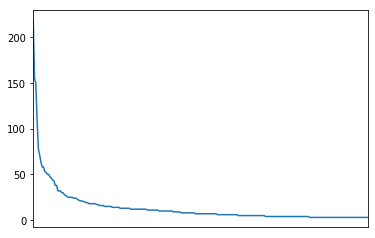

In [47]:
reviewss = pd.DataFrame(REVIEWS[city])
df_bus_groups = reviewss.groupby('business_id').review_id.count()
df_bus_city_sorted = df_bus_groups.sort_values(ascending = False)
df_bus_city_sorted.plot(kind = 'line').axes.get_xaxis().set_visible(False)


# Hoofdpagina

## Stap 1: Stad uitkiezen

In [2]:
user_id = None

# kies een random stad uit, gezien er geen info is over de stad
if user_id == None:
    city = random.choice(CITIES)
# kies de stad van de gebruiker !!!!!!!! Dit moet de gebruiker invullen als hij zich registreerd
else:
    city = user_id[city]
city

'westlake'

## Stap 2: Aanbevolen businesses op basis van stad

In [3]:
rand = []

# selecteer de beste zaken op basis van de random gekozen stad
businesses = pd.DataFrame(BUSINESSES[city])
# de zaken moet minstens 20 ratings hebben en ze zijn geordend op beste gemiddelde sterren
the_best = businesses[businesses['review_count'] >20].sort_values('stars',ascending = False)[:6]

best_list = list(the_best['business_id'])

# voor de sliders laten we 4 random gekozen business zien op de homepage
while len(rand) < 4:
    zaak = random.choice(BUSINESSES[city])['business_id']
    if zaak not in best_list:
        rand.append(zaak) 
    set(rand)
    
home = rand + best_list
home

['jkDmcMpYWggYp5Ue4Nh-Dg',
 '6P-O4Tug5huPoA8NzbgPDw',
 'EDzj2cVa1Wjk6IRsDfgQ-g',
 'OD88wvH-9LxM_Gz4oHOIDg',
 '-mP3F3srknwKJdJ5FqcX5Q',
 'pYad8gX0DTOGFDcF5p8dxw',
 'dVvij7VRh55dISu02I0IGw',
 'He6gCZdGICRXw-G7IusxBA',
 '7hIl2AOZl6Zfr2fAojpeRw',
 '0I0yATfnNQJB-A-IPGgqDA']

# Business pagina

## Stap 1: Business selecteren en meegeven van de homepage

In [4]:
business = random.choice(BUSINESSES[city])['business_id']
business

'OiR6kP_mAD47vKU1WiPshg'

## Stap 2: Business df van de gegeven stad

In [5]:
df = pd.DataFrame(BUSINESSES[city])

In [6]:
def extract_categories(df):
    """Create an unfolded genre dataframe. Unpacks genres seprated by a '|' into seperate rows.

    Arguments:
    movies -- a dataFrame containing at least the columns 'movieId' and 'genres' 
              where genres are seprated by '|'
    """
    categories = businesses.apply(lambda row: pd.Series([row['business_id']] 
                                                        + row['categories'].lower().split(", ")), axis=1)
    stack_genres = categories.set_index(0).stack()
    df_stack_genres = stack_genres.to_frame()
    df_stack_genres['business_id'] = stack_genres.index.droplevel(1)
    df_stack_genres.columns = ['categories', 'business_id']
    return df_stack_genres.reset_index()[['business_id', 'categories']]

def pivot_genres(df):
    """Create a one-hot encoded matrix for genres.
    
    Arguments:
    df -- a dataFrame containing at least the columns 'movieId' and 'genre'
    
    Output:
    a matrix containing '0' or '1' in each cell.
    1: the movie has the genre
    0: the movie does not have the genre
    """
    #categories = set(list(extract_categories(df)['categories']))
    return df.pivot_table(index = 'business_id', columns = 'categories', aggfunc = 'size', fill_value=0)

df_matrix = pivot_genres(extract_categories(df))
display(df_matrix)

categories,accessories,active life,afghan,air duct cleaning,airport shuttles,airports,american (new),american (traditional),antiques,apartments,...,waxing,wedding planning,weight loss centers,whiskey bars,wholesale stores,windows installation,wine & spirits,wine bars,women's clothing,yoga
business_id,,,,,,,,,,,,,,,,,,,,,
-MsRvdPnuw6QuLn5Vxjruw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-ak1fx5L9cNjUE56as12MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-lAV1uegafxCjGE306kBYQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-mP3F3srknwKJdJ5FqcX5Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-oi8V6CcxMT4pUcs1XmLEg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-pmqS-odJCmxOvWfRFAQ9Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0I0yATfnNQJB-A-IPGgqDA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0J2QK4Hk8EvJKYGu65qH8w,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0VJ8tBxOpD2OxuioVjaAxA,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


## Stap 3: Similarity Matrix

In [7]:
def create_similarity_matrix_categories(matrix):
    """Create a  """
    npu = matrix.values
    m1 = npu @ npu.T
    diag = np.diag(m1)
    m2 = m1 / diag
    m3 = np.minimum(m2, m2.T)
    return pd.DataFrame(m3, index = matrix.index, columns = matrix.index)

In [8]:
df_similarity = create_similarity_matrix_categories(df_matrix)
display(df_similarity.head())

business_id,-MsRvdPnuw6QuLn5Vxjruw,-ak1fx5L9cNjUE56as12MA,-lAV1uegafxCjGE306kBYQ,-mP3F3srknwKJdJ5FqcX5Q,-oi8V6CcxMT4pUcs1XmLEg,-pmqS-odJCmxOvWfRFAQ9Q,0I0yATfnNQJB-A-IPGgqDA,0J2QK4Hk8EvJKYGu65qH8w,0VJ8tBxOpD2OxuioVjaAxA,0ZN2MfHyjNIkCx7qJvVhDg,...,z71IqTCbQW7uzw2H2T1QrA,zF-rCRzv3tTDbO5oqT5lkw,zKyXbR3n4D74IS9ppg4YyA,zOdx4EdRSb2BM06hbq5Tww,zPvaMKlV8KKEUwtN9bWWRQ,z_LKBi-nZz6FrQUu5ZTa7Q,zcN7cJvxIXY7cDBjI86Ziw,zpCS2Gt8MOPiiIham-OBKw,zq4i9ZtLebbvyWjKXec3NQ,zuR-nKrXfVl4_WVP0n_AMg
business_id,,,,,,,,,,,,,,,,,,,,,
-MsRvdPnuw6QuLn5Vxjruw,1.000,0.000000,0.0,0.000000,0.125,0.125,0.0,0.125,0.000000,0.0,...,0.0,0.0,0.125,0.125,0.0,0.125,0.000000,0.0,0.0,0.125
-ak1fx5L9cNjUE56as12MA,0.000,1.000000,0.0,0.333333,0.000,0.000,0.0,0.000,0.083333,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.142857,0.0,0.0,0.000
-lAV1uegafxCjGE306kBYQ,0.000,0.000000,1.0,0.000000,0.000,0.000,0.0,0.000,0.000000,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000000,0.0,0.0,0.000
-mP3F3srknwKJdJ5FqcX5Q,0.000,0.333333,0.0,1.000000,0.000,0.000,0.0,0.000,0.083333,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.142857,0.0,0.0,0.000
-oi8V6CcxMT4pUcs1XmLEg,0.125,0.000000,0.0,0.000000,1.000,0.000,0.0,0.000,0.000000,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000000,0.0,0.0,0.000


## Stap 4: Recommended businesses op basis gegeven business

In [10]:
def select_neighborhood(similarity_matrix, utility_matrix, target_business):
    # list of businesses that are related to the target_business
    similar = list(similarity_matrix[similarity_matrix[target_business] > 0].index)
    # businesses that are related 
    rest = list(similar)
    
    return similarity_matrix[target_business][rest]    

neighborhood = select_neighborhood(df_similarity, df_matrix, business)
rec_bus = neighborhood.sort_values(ascending = False)
#display(rec_bus)

In [11]:
rand_bus = []

# selecteer de beste zaken op basis van de random gekozen stad
businesses = pd.DataFrame(BUSINESSES[city])
# de zaken moet minstens 20 ratings hebben en ze zijn geordend op beste gemiddelde sterren
best_bus = list(rec_bus[1:7].index)

# voor de sliders laten we 4 random gekozen business zien op de businesspage
while len(rand_bus) < 4:
    zaak = random.choice(BUSINESSES[city])['business_id']
    if zaak not in best_bus:
        rand_bus.append(zaak) 
    set(rand_bus)
    
bus_page = best_bus + rand_bus
bus_page

['1p5izA5Py5zN7CuNAxPkvw',
 'OiR6kP_mAD47vKU1WiPshg',
 'Gd5jcl9smnwASaFYmJX75A',
 '9MpWhQOYziJ38EB7MctxcA',
 'AdXJ1hkcH3RRZ2xqBhtuTQ',
 'kkNWzhSpAjxm0zIxol3IzQ',
 'dHgzFLkOZ2tmlMPVU4wqEw',
 'piHqTyHSdeDuqpHM8dyDIg',
 'qJkDbR5GCCjCafqc10A9iQ',
 'Bg2Qcn3STmYHPCR8CT_Z2w']

# Collaborative Filtering Matrixen

In [ ]:
def pivot_ratings(df):
    """Creates a utility matrix for user ratings for movies
    
    Arguments:
    df -- a dataFrame containing at least the columns 'movieId' and 'genres'
    
    Output:
    a matrix containing a rating in each cell. np.nan means that the user did not rate the movie
    """
    return df.pivot(values='rating', columns='user_id', index='business_id')

def create_similarity_matrix_cosine(matrix):
    """Creates a adjusted(/soft) cosine similarity matrix.
    
    Arguments:
    matrix -- a utility matrix
    
    Notes:
    Missing values are set to 0. This is technically not a 100% correct, but is more convenient 
    for computation and does not have a big effect on the outcome.
    """
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.cosine_similarity(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

In [ ]:
df_utility_ratings = df_train.reset_index().pivot_table(values='rating', columns='user_id', index='business_id')
df_similarity_ratings = create_similarity_matrix_cosine(df_utility_ratings)
display(df_utility_ratings.head())
display(df_similarity_ratings.head())

# Recommendation testen

## Stap 1 : Dataframe opstellen met user, business en rating

In [12]:
review = pd.DataFrame(REVIEWS['sun city'])
businesses = pd.DataFrame(BUSINESSES['sun city'])
# alleen businesses met meer dan 20 reviews
above_20 = businesses[businesses['review_count'] >20]

df = pd.merge(review, above_20, on='business_id', how='outer').dropna()
collab = df.drop(['postal_code', 'is_open', 'address', 'categories',
                  'city','attributes','state','date','hours','text','cool', 'funny','useful'
                 , 'review_id','latitude','longitude' ,'name' ,'review_count','stars_y'],axis=1)
collab = collab.rename(index=str, columns={"stars_x": "rating"})

## Stap 2: Data splitsen in test en train data

In [13]:
def split_data(data, d = 0.75):
    """Split data in a training and test set.
    
    Arguments:
    data -- any dataFrame.
    d    -- the fraction of data in the training set
    """
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

In [14]:
df_train, df_test = split_data(collab, 0.9)

## Stap 3 : D.m.v. predict_ratings functie de predicted ratings krijgen

In [17]:
def predict_ratings(similarity, utility, to_predict):
    """Predicts the predicted rating for the input test data.
    
    Arguments:
    similarity -- a dataFrame that describes the similarity between items
    utility    -- a dataFrame that contains a rating for each user (columns) and each movie (rows). 
                  If a user did not rate an item the value np.nan is assumed. 
    to_predict -- A dataFrame containing at least the columns movieId and userId for which to do the predictions
    """
    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

### Helper functions for predict_ratings_item_based ###

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 0

def predict_vectors(user_ratings, similarities):
    # select only movies actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm

In [39]:
df_predicted_cf_item_based = predict_ratings(df_similarity_ratings, df_utility_ratings, df_test[['user_id', 'business_id', 'rating']])
#display(df_predicted_cf_item_based.head())

## Stap 4 : Bereken MSE en RMSE met gegeven functies

In [ ]:
def mse(predicted_ratings):
    """Computes the mean square error between actual ratings and predicted ratings
    
    Arguments:
    predicted_ratings -- a dataFrame containing the columns rating and predicted rating
    """
    diff = predicted_ratings['rating'] - predicted_ratings['predicted rating']
    return (diff**2).mean()

def rmse(predicted_ratings):
    """Computes the mean square error between actual ratings and predicted ratings
    
    Arguments:
    predicted_ratings -- a dataFrame containing the columns rating and predicted rating
    """
    diff = np.sqrt(((predicted_ratings['rating'])**2 - (predicted_ratings['predicted rating'])**2))
    return diff.mean()

In [37]:
# collaborative filtering
mse_cf_item_based = mse(df_predicted_cf_item_based[df_predicted_cf_item_based['predicted rating'] > 0])
rmse_cf_item_based = rmse(df_predicted_cf_item_based[df_predicted_cf_item_based['predicted rating'] > 0])

# content based
mse_cf_content_based = predict_ratings(df_similarity_genres, df_utility_ratings, df_predicted_cf_item_based)
mse_genres = mse(mse_cf_content_based[mse_cf_content_based['predicted rating'] > 0])
rmse_cf_content_based = predict_ratings(df_similarity_genres, df_utility_ratings, df_predicted_cf_item_based)
rmse_genres = rmse(rmse_cf_content_based[rmse_cf_content_based['predicted rating'] > 0])

print(f'mse for item based collaborative filtering {mse_cf_item_based:.2f}')
print(f'mse for content based filtering: {mse_genres:.2f}')
print(f'rmse for item based collaborative filtering {rmse_cf_item_based:.2f}')
print(f'rmse for content based filtering: {rmse_genres:.2f}')


C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


mse for item based collaborative filtering 2.75
mse for content based filtering: 2.00
rmse for item based collaborative filtering 1.68
rmse for content based filtering: 1.31
